In [1]:
print("Hello")

Hello


In [2]:
# import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("breast-cancer-wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [46]:
#remove Id and unnamed columns
df = df.drop(columns = ['id','Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


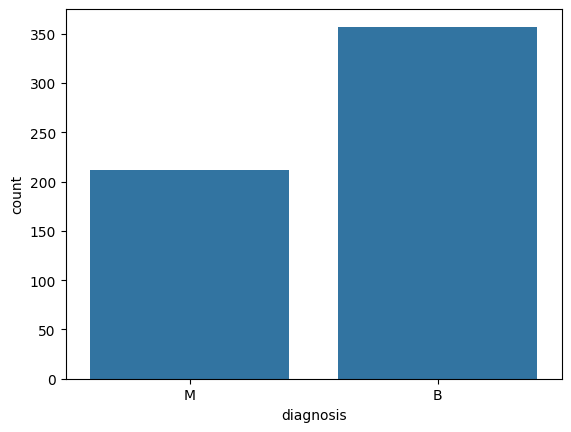

In [8]:
sns.countplot(x='diagnosis', data=df)
plt.show()

In [47]:
# new colum for benign and malign
df['benign_0__mal_1'] = 0
df.loc[df['diagnosis']=='M', 'benign_0__mal_1'] = 1

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0__mal_1
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


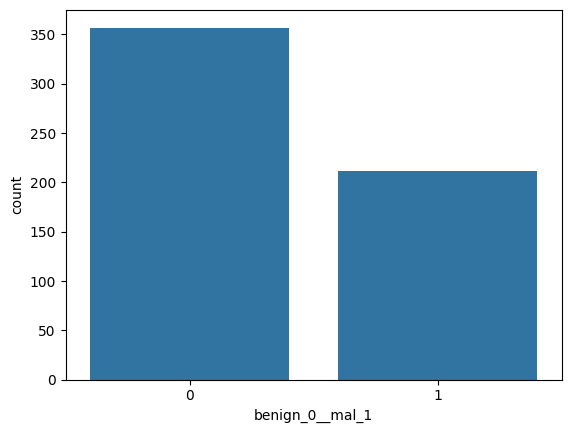

In [11]:
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

In [48]:
# drop Diagnosis
df = df.drop(columns = ['diagnosis'])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [13]:
df.shape

(569, 31)

In [49]:
# independent and dependent

X = df.drop(['benign_0__mal_1'], axis=1)
y = df['benign_0__mal_1']

In [16]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: benign_0__mal_1, dtype: int64

In [18]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [50]:
#apply min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [51]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [21]:
# ann with sklearn
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100)

In [22]:
model.score(X_test, y_test)

0.9298245614035088

In [52]:
# build ANN with tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

In [53]:
model = Sequential()
model.add(InputLayer(input_shape=(30,))) # input layer
model.add(Dense(10, activation='relu')) # hidden layer 1
model.add(Dense(5, activation='relu')) # hidden layer 2
model.add(Dense(1, activation='sigmoid')) # output layer

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.7244 - accuracy: 0.6484 - val_loss: 0.7525 - val_accuracy: 0.5439
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.6484 - val_loss: 0.7186 - val_accuracy: 0.5439
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6484 - val_loss: 0.6803 - val_accuracy: 0.5439
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.6484 - val_loss: 0.6535 - val_accuracy: 0.5439
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.6484 - val_loss: 0.6198 - val_accuracy: 0.5439
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.6484 - val_loss: 0.5969 - val_accuracy: 0.5439
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5256 - accuracy: 0.6484 - val_loss: 0.5743 - val_accuracy: 0.5439
Epoch 8/100


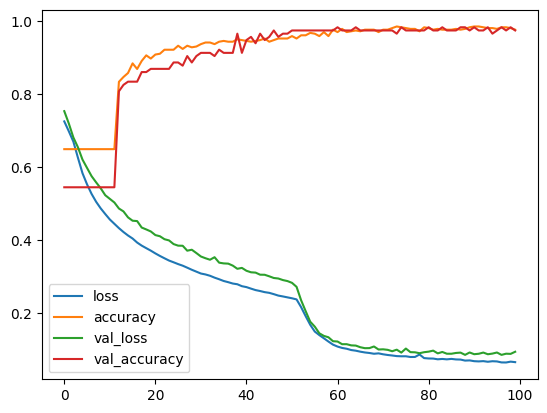

In [55]:
# plot train and test accuracy
import matplotlib.pyplot as plt
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [ ]:
# early stop
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)
model.fit(X_train, y_train, epochs=100, 
            validation_data=(X_test, y_test), 
            callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0490 - accuracy: 0.9868 - val_loss: 0.0666 - val_accuracy: 0.9825
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0490 - accuracy: 0.9890 - val_loss: 0.0665 - val_accuracy: 0.9737
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9868 - val_loss: 0.0668 - val_accuracy: 0.9737
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9868 - val_loss: 0.0668 - val_accuracy: 0.9737
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0477 - accuracy: 0.9890 - val_loss: 0.0668 - val_accuracy: 0.9649
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0483 - accuracy: 0.9868 - val_loss: 0.0669 - val_accuracy: 0.9737
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0478 - accuracy: 0.9868 - val_loss: 0.0679 - val_accuracy: 0.9825
Epoch 8/100


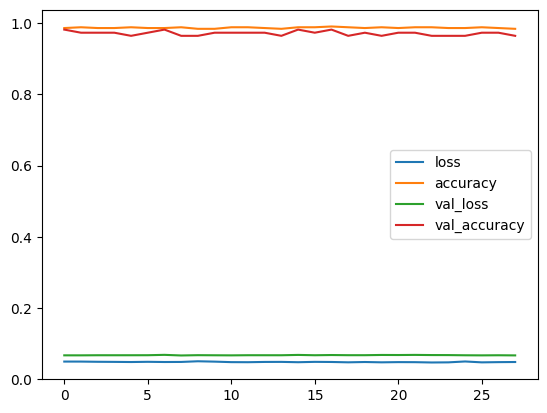

In [41]:
# plot train and test accuracy
import matplotlib.pyplot as plt
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [57]:
# save model
model.save('BC_model.h5')

In [58]:
# save scalar parameters
import pickle
with open("BC_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# for predictions on new input

In [ ]:
import streamlit as st
import tensorflow as tf
import pandas as pd
import pickle
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# Page config
# -------------------------------
st.set_page_config(
    page_title="Breast Cancer Prediction",
    layout="centered"
)

st.title("Breast Cancer Prediction")
st.write("Enter the tumor feature values and predict the class.")

# -------------------------------
# Load model & scaler (once)
# -------------------------------
@st.cache_resource
def load_artifacts():
    model = tf.keras.models.load_model("BC_model.h5")
    with open("BC_scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    return model, scaler

model, scaler = load_artifacts()

# -------------------------------
# Input fields (EXACT feature names)
# -------------------------------
st.subheader("Input Features")

input_data = {
    'radius_mean': st.number_input('radius_mean', value=14.0),
    'texture_mean': st.number_input('texture_mean', value=20.0),
    'perimeter_mean': st.number_input('perimeter_mean', value=90.0),
    'area_mean': st.number_input('area_mean', value=600.0),
    'smoothness_mean': st.number_input('smoothness_mean', value=0.1),
    'compactness_mean': st.number_input('compactness_mean', value=0.15),
    'concavity_mean': st.number_input('concavity_mean', value=0.2),
    'concave points_mean': st.number_input('concave points_mean', value=0.1),
    'symmetry_mean': st.number_input('symmetry_mean', value=0.2),
    'fractal_dimension_mean': st.number_input('fractal_dimension_mean', value=0.06),

    'radius_se': st.number_input('radius_se', value=0.2),
    'texture_se': st.number_input('texture_se', value=1.0),
    'perimeter_se': st.number_input('perimeter_se', value=1.5),
    'area_se': st.number_input('area_se', value=20.0),
    'smoothness_se': st.number_input('smoothness_se', value=0.005),
    'compactness_se': st.number_input('compactness_se', value=0.02),
    'concavity_se': st.number_input('concavity_se', value=0.03),
    'concave points_se': st.number_input('concave points_se', value=0.01),
    'symmetry_se': st.number_input('symmetry_se', value=0.03),
    'fractal_dimension_se': st.number_input('fractal_dimension_se', value=0.004),

    'radius_worst': st.number_input('radius_worst', value=16.0),
    'texture_worst': st.number_input('texture_worst', value=25.0),
    'perimeter_worst': st.number_input('perimeter_worst', value=105.0),
    'area_worst': st.number_input('area_worst', value=800.0),
    'smoothness_worst': st.number_input('smoothness_worst', value=0.12),
    'compactness_worst': st.number_input('compactness_worst', value=0.2),
    'concavity_worst': st.number_input('concavity_worst', value=0.3),
    'concave points_worst': st.number_input('concave points_worst', value=0.15),
    'symmetry_worst': st.number_input('symmetry_worst', value=0.25),
    'fractal_dimension_worst': st.number_input('fractal_dimension_worst', value=0.08),
}

# -------------------------------
# Prediction
# -------------------------------
if st.button("Predict"):
    input_df = pd.DataFrame([input_data])

    # Safety check — do NOT remove
    if list(input_df.columns) != list(scaler.feature_names_in_):
        st.error("Feature mismatch between input and trained scaler.")
        st.stop()

    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0][0]

    predicted_class = "Malignant" if prediction > 0.5 else "Benign"

    st.subheader("Result")
    st.write(f"**Prediction:** {predicted_class}")
    st.write(f"**Probability:** {prediction:.4f}")


1/1 [==============================] - 1s 709ms/step
['Malignant']
